# Data Fields

datetime:  
hourly date + timestamp  

season:  
1 = spring, 2 = summer, 3 = fall, 4 = winter  

holiday:  
whether the day is considered a holiday  

workingday:  
whether the day is neither a weekend nor holiday  

weather:  
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  

temp:  
temperature in Celsius  

atemp:
"feels like" temperature in Celsius  

humidity:  
relative humidity  

windspeed:  
wind speed  

casual:  
number of non-registered user rentals initiated  

registered:  
number of registered user rentals initiated  

count:  
number of total rentals

# Importation datas

In [62]:
import calendar
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
from scipy import stats

from vivadata.datasets.common import get_path_for_dataset

%matplotlib inline
sns.set()

In [63]:
base_path = get_path_for_dataset('bike-sharing/train.csv')
base_path

'/home/fred/code/fred/vivadata-curriculum/cache/datasets/bike-sharing/train.csv'

In [64]:
df = pd.read_csv(os.path.join(base_path))

In [65]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# EDA

## Suppression des colonnes 'casual' et 'registered'

casual:
number of non-registered user rentals initiated 

registered:
number of registered user rentals initiated 

In [66]:
drop_lst = ['casual', 'registered']
df = df.drop(drop_lst, axis=1)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 850.5+ KB


In [68]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


# Analyses univariées

## TARGET: Count

count:
number of total rentals

In [69]:
df['count'].head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [70]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

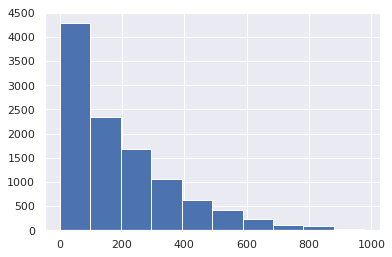

In [71]:
plt.hist(df['count']);

In [90]:
count_boxcox, _ = stats.boxcox(df['count'])
count_boxcox

array([ 4.43314545,  6.98267424,  6.29227393, ..., 12.79939255,
       11.5219654 ,  9.85125836])

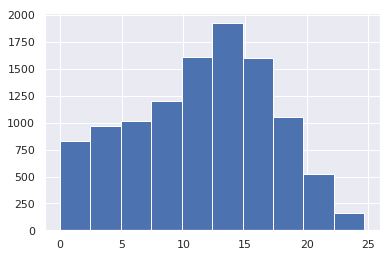

In [73]:
plt.hist(count_boxcox);

**Avec la fonction boxcox, on a une répartition presque normale.**

## Datetime

datetime:
hourly date + timestamp 

In [74]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [75]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.5 KB


In [77]:
df['dow'] = df['datetime'].dt.dayofweek
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dow
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,5


In [78]:
df['month'] = df['datetime'].dt.month
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dow,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,5,1


In [79]:
df['week'] = df['datetime'].dt.week
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dow,month,week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,5,1,52
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,5,1,52
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,5,1,52
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,5,1,52
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,5,1,52


In [80]:
df['hour'] = df['datetime'].dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dow,month,week,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,5,1,52,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,5,1,52,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,5,1,52,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,5,1,52,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,5,1,52,4


In [81]:
df['year'] = df['datetime'].dt.year
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dow,month,week,hour,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,5,1,52,0,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,5,1,52,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,5,1,52,2,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,5,1,52,3,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,5,1,52,4,2011


In [82]:
df['day'] = df['datetime'].dt.day
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dow,month,week,hour,year,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,5,1,52,0,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,5,1,52,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,5,1,52,2,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,5,1,52,3,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,5,1,52,4,2011,1


In [83]:
df = df.set_index(df['datetime'])
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dow,month,week,hour,year,day
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,5,1,52,0,2011,1
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,5,1,52,1,2011,1
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,5,1,52,2,2011,1
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,5,1,52,3,2011,1
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,5,1,52,4,2011,1


In [84]:
df = df.drop(labels='datetime', axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dow,month,week,hour,year,day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,5,1,52,0,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,5,1,52,1,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,5,1,52,2,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,5,1,52,3,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,5,1,52,4,2011,1


## seasons

season:
1 = spring, 2 = summer, 3 = fall, 4 = winter 

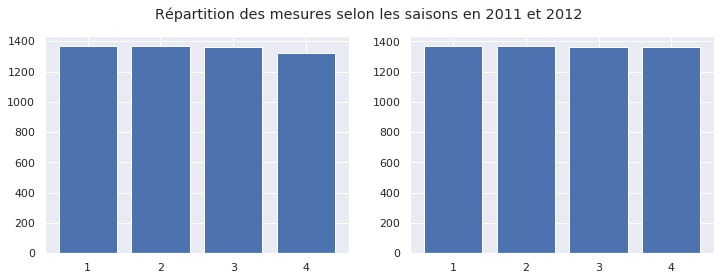

In [158]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

names = ['1', '2', '3', '4']

values = df['season'][df['year'] == 2011].value_counts()
ax[0].bar(names, values)

values = df['season'][df['year'] == 2012].value_counts()
ax[1].bar(names, values)

fig.suptitle('Répartition des mesures selon les saisons en 2011 et 2012');

In [161]:
spring_2011 = int(df['season'][df['season'] == 1][df['year'] == 2011].value_counts())
summer_2011 = int(df['season'][df['season'] == 2][df['year'] == 2011].value_counts())
fall_2011 = int(df['season'][df['season'] == 3][df['year'] == 2011].value_counts())
winter_2011 = int(df['season'][df['season'] == 4][df['year'] == 2011].value_counts())

spring_2012 = int(df['season'][df['season'] == 1][df['year'] == 2012].value_counts())
summer_2012 = int(df['season'][df['season'] == 2][df['year'] == 2012].value_counts())
fall_2012 = int(df['season'][df['season'] == 3][df['year'] == 2012].value_counts())
winter_2012 =int(df['season'][df['season'] == 4][df['year'] == 2012].value_counts())

print("Nombre de mesures au Printemps 2011: {}".format(spring_2011))
print("Nombre de mesures en Eté 2011: {}".format(summer_2011))
print("Nombre de mesures en Automne 2011: {}".format(fall_2011))
print("Nombre de mesures en Hiver 2011: {}".format(winter_2011))
print("-----------------------------------------")
print("Nombre de mesures au Printemps 2012: {}".format(spring_2012))
print("Nombre de mesures en Eté 2012: {}".format(summer_2012))
print("Nombre de mesures en Automne 2012: {}".format(fall_2012))
print("Nombre de mesures en Hiver 2012: {}".format(winter_2012))

Nombre de mesures au Printemps 2011: 1323
Nombre de mesures en Eté 2011: 1367
Nombre de mesures en Automne 2011: 1365
Nombre de mesures en Hiver 2011: 1367
-----------------------------------------
Nombre de mesures au Printemps 2012: 1363
Nombre de mesures en Eté 2012: 1366
Nombre de mesures en Automne 2012: 1368
Nombre de mesures en Hiver 2012: 1367


**Il n'y a pas de différence concernant la répartition des mesures au-niveau des saisons pour les deux années.**

## Holiday

holiday:
whether the day is considered a holiday 

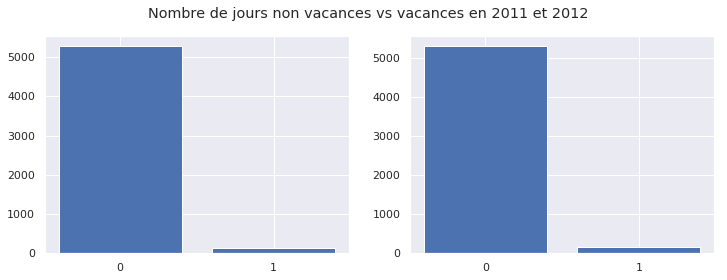

In [172]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

names = ['0', '1']

values = df['holiday'][df['year'] == 2011].value_counts()
ax[0].bar(names, values)

values = df['holiday'][df['year'] == 2012].value_counts()
ax[1].bar(names, values)

fig.suptitle('Nombre de jours non vacances vs vacances en 2011 et 2012');

In [173]:
no_holiday_2011 = int(df['holiday'][df['holiday'] == 0][df['year'] == 2011].value_counts())
holiday_2011 = int(df['holiday'][df['holiday'] == 1][df['year'] == 2011].value_counts())
no_holiday_2012 = int(df['holiday'][df['holiday'] == 0][df['year'] == 2012].value_counts())
holiday_2012 = int(df['holiday'][df['holiday'] == 1][df['year'] == 2012].value_counts())

print("Nombre de jours non vacances en 2011: {}".format(no_holiday_2011))
print("Nombre de jours non vacances en 2012: {}".format(no_holiday_2012))
print("Nombre de jours de vacances en 2011: {}".format(holiday_2011))
print("Nombre de jours de vacances en 2012: {}".format(holiday_2012))
print('----------------')
total_2011 = no_holiday_2011 + holiday_2011
total_2012 = no_holiday_2012 + holiday_2012
print('Nombre de jours non vacances en 2011: {:.0f}%'.format(no_holiday_2011 / total_2011 * 100))
print('Nombre de jours non vacances en 2012: {:.0f}%'.format(no_holiday_2012 / total_2012 * 100))

Nombre de jours non vacances en 2011: 5278
Nombre de jours non vacances en 2012: 5297
Nombre de jours de vacances en 2011: 144
Nombre de jours de vacances en 2012: 167
----------------
Nombre de jours non vacances en 2011: 97%
Nombre de jours non vacances en 2012: 97%


**On observe une nette différence dans la répartition des jours de vacances pour les deux années.**

## Working day

workingday:
whether the day is neither a weekend nor holiday 

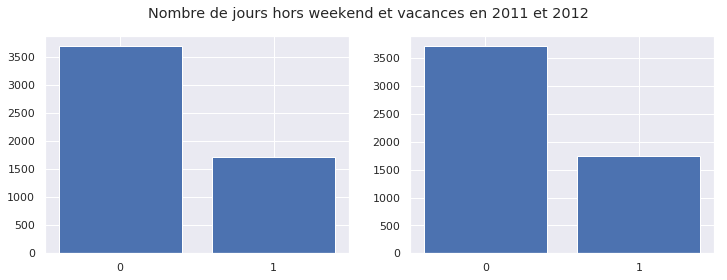

In [170]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

names = ['0', '1']

values = df['workingday'][df['year'] == 2011].value_counts()
ax[0].bar(names, values)

values = df['workingday'][df['year'] == 2012].value_counts()
ax[1].bar(names, values)

fig.suptitle('Nombre de jours hors weekend et vacances en 2011 et 2012');

In [171]:
no_workingday_2011 = int(df['workingday'][df['workingday'] == 0][df['year'] == 2011].value_counts())
workingday_2011 = int(df['workingday'][df['workingday'] == 1][df['year'] == 2011].value_counts())
no_workingday_2012 = int(df['workingday'][df['workingday'] == 0][df['year'] == 2012].value_counts())
workingday_2012 = int(df['workingday'][df['workingday'] == 1][df['year'] == 2012].value_counts())

print("Nombre de jours weekend/vacances en 2011: {}".format(no_workingday_2011))
print("Nombre de jours hors weekend et vacances en 2011: {}".format(workingday_2011))
print("Nombre de jours weekend/vacances en 2011: {}".format(no_workingday_2012))
print("Nombre de jours hors weekend et vacances en 2011: {}".format(workingday_2012))
print('----------------')
total_2011 = no_workingday_2011 + workingday_2011
total_2012 = no_workingday_2012 + workingday_2012
print('Nombre de jours weekend/vacances en 2011: {:.0f}%'.format(no_workingday_2011 / total_2011 * 100))
print('Nombre de jours weekend/vacances en 2012: {:.0f}%'.format(no_workingday_2012 / total_2012 * 100))

Nombre de jours weekend/vacances en 2011: 1724
Nombre de jours hors weekend et vacances en 2011: 3698
Nombre de jours weekend/vacances en 2011: 1750
Nombre de jours hors weekend et vacances en 2011: 3714
----------------
Nombre de jours weekend/vacances en 2011: 32%
Nombre de jours weekend/vacances en 2012: 32%


**On a une différence de répartition des jours hors weekend et vacances pour les deux années.**

## weather

weather:  
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   

In [176]:
df['weather'].unique()

array([1, 2, 3, 4])

In [177]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

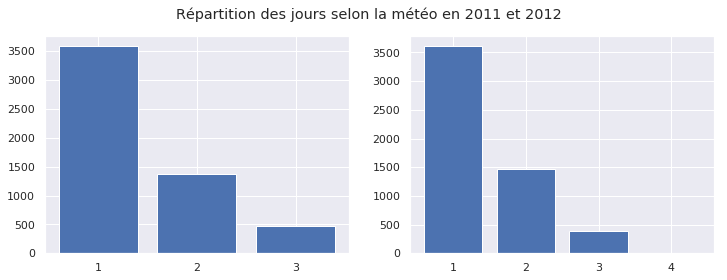

In [182]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

names_2011 = ['1', '2', '3']
names_2012 = ['1', '2', '3', '4']

values = df['weather'][df['year'] == 2011].value_counts()
ax[0].bar(names_2011, values)

values = df['weather'][df['year'] == 2012].value_counts()
ax[1].bar(names_2012, values)

fig.suptitle('Répartition des jours selon la météo en 2011 et 2012');

In [201]:
weather_2011_1 = df['weather'][df['weather'] == 1][df['year'] == 2011].value_counts()
weather_2011_2 = df['weather'][df['weather'] == 2][df['year'] == 2011].value_counts()
weather_2011_3 = df['weather'][df['weather'] == 3][df['year'] == 2011].value_counts()

weather_2012_1 = df['weather'][df['weather'] == 1][df['year'] == 2012].value_counts()
weather_2012_2 = df['weather'][df['weather'] == 2][df['year'] == 2012].value_counts()
weather_2012_3 = df['weather'][df['weather'] == 3][df['year'] == 2012].value_counts()
weather_2012_4 = df['weather'][df['weather'] == 4][df['year'] == 2012].value_counts()

print('Nombre de jours weather_1 en 2011: {}'.format(int(weather_2011_1)))
print('Nombre de jours weather_2 en 2011: {}'.format(int(weather_2011_2)))
print('Nombre de jours weather_3 en 2011: {}'.format(int(weather_2011_3)))
print('--------------')
print('Nombre de jours weather_1 en 2012: {}'.format(int(weather_2012_1)))
print('Nombre de jours weather_2 en 2012: {}'.format(int(weather_2012_2)))
print('Nombre de jours weather_3 en 2012: {}'.format(int(weather_2012_3)))
print('Nombre de jours weather_4 en 2012: {}'.format(int(weather_2012_4)))
print('---------------')
total_2011 = int(weather_2011_1) + int(weather_2011_2) + int(weather_2011_3)
total_2012 = int(weather_2012_1) + int(weather_2012_2) + int(weather_2012_3) + int(weather_2012_4)
print('Nombre de jours weather_1 en 2011: {:.0f}%'.format(int(weather_2011_1) / int(total_2011) * 100))
print('Nombre de jours weather_2 en 2011: {:.0f}%'.format(int(weather_2011_2) / int(total_2011) * 100))
print('Nombre de jours weather_3 en 2011: {:.0f}%'.format(int(weather_2011_3) / int(total_2011) * 100))
print('--------------')
print('Nombre de jours weather_1 en 2012: {:.0f}%'.format(int(weather_2012_1) / int(total_2012) * 100))
print('Nombre de jours weather_2 en 2012: {:.0f}%'.format(int(weather_2012_2) / int(total_2012) * 100))
print('Nombre de jours weather_3 en 2012: {:.0f}%'.format(int(weather_2012_3) / int(total_2012) * 100))
print('Nombre de jours weather_4 en 2012: {:.0f}%'.format(int(weather_2012_4) / int(total_2012) * 100))

Nombre de jours weather_1 en 2011: 3583
Nombre de jours weather_2 en 2011: 1366
Nombre de jours weather_3 en 2011: 473
--------------
Nombre de jours weather_1 en 2012: 3609
Nombre de jours weather_2 en 2012: 1468
Nombre de jours weather_3 en 2012: 386
Nombre de jours weather_4 en 2012: 1
---------------
Nombre de jours weather_1 en 2011: 66%
Nombre de jours weather_2 en 2011: 25%
Nombre de jours weather_3 en 2011: 9%
--------------
Nombre de jours weather_1 en 2012: 66%
Nombre de jours weather_2 en 2012: 27%
Nombre de jours weather_3 en 2012: 7%
Nombre de jours weather_4 en 2012: 0%


**On observe une différence de répartition des jours selon la météo pour les deux années.**

## Temp

In [202]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dow,month,week,hour,year,day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,5,1,52,0,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,5,1,52,1,2011,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,5,1,52,2,2011,1
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,5,1,52,3,2011,1
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,5,1,52,4,2011,1


In [203]:
df['temp'].describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

## Rename good seasons by months

In [19]:
for i in range(len(df)):
    if df['month'][i] == 12:
        df['season'][i] = 4
    elif df['month'][i] == 1:
        df['season'][i] = 4
    elif df['month'][i] == 2:
        df['season'][i] = 4
    elif df['month'][i] == 3:
        df['season'][i] = 1
    elif df['month'][i] == 4:
        df['season'][i] = 1
    elif df['month'][i] == 5:
        df['season'][i] = 1
    elif df['month'][i] == 6:
        df['season'][i] = 2
    elif df['month'][i] == 7:
        df['season'][i] = 2
    elif df['month'][i] == 8:
        df['season'][i] = 2
    else:
        df['season'][i] = 3

/home/fred/bin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/fred/bin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/fred/bin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/fred/bin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: S

In [20]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,month,week,hour,year,day
0,2011-01-01 00:00:00,4,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,52,0,2011,1
1,2011-01-01 01:00:00,4,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,52,1,2011,1
2,2011-01-01 02:00:00,4,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1,52,2,2011,1
3,2011-01-01 03:00:00,4,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1,52,3,2011,1
4,2011-01-01 04:00:00,4,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1,52,4,2011,1


## Locations by year vs seasons

Seasons:  
1 -> Printemps  
2 -> Eté  
3 -> Automne  
4 -> Hiver

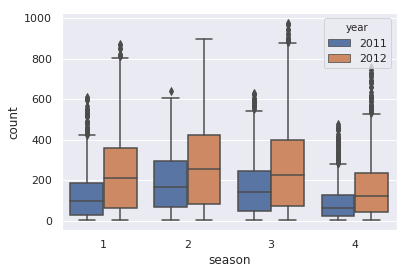

In [21]:
sns.boxplot(x=df['season'], y=df['count'], hue=df['year']);

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


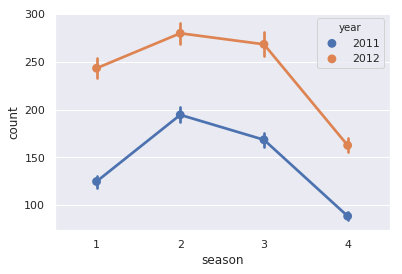

In [22]:
sns.pointplot(x=df['season'], y=df['count'], hue=df['year']);

In [23]:
(df['count'][df['year'] == 2012].sum() / df['count'][df['year'] == 2011].sum()).round(2)

1.67

In [24]:
df['count'][df['year'] == 2012].count() - df['count'][df['year'] == 2011].count()

42

**Globalement, il y a moins de locations en hiver pour les années 2011 et 2012.  
Les pics de locations sont en Eté pour les deux années.  
Il y a 1.67 fois plus de locations en 2012 qu'en 2011.  
Il y a 42 mesures en plus en 2012.**

## Locations by month vs seasons

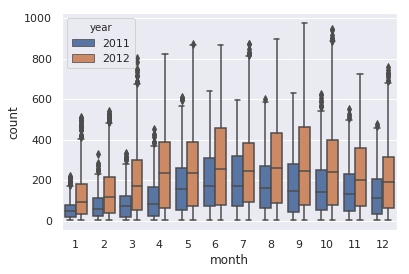

In [25]:
sns.boxplot(x=df['month'], y=df['count'], hue=df['year']);

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


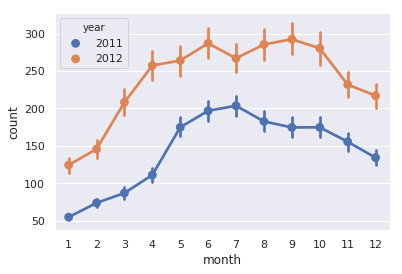

In [26]:
sns.pointplot(x=df['month'], y=df['count'], hue=df['year']);

**On a une inversion de tendance en juillet avec une baisse en 2012 mais qui remonte ensuite mais pas en 2011 où la baisse continue.**

## Locations en fonction de l'heure

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


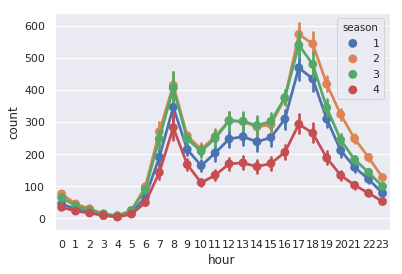

In [27]:
sns.pointplot(x=df['hour'], y=df['count'], hue=df['season']);

**Les tendances sont similaires en fonction des saisons, cependant on observe deux pics:**  
- 8h
- 17/18h

**Ceci correspond aux heures de début et fin de journée travaillée.**

## Locations pour les jours travaillés vs vacances

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


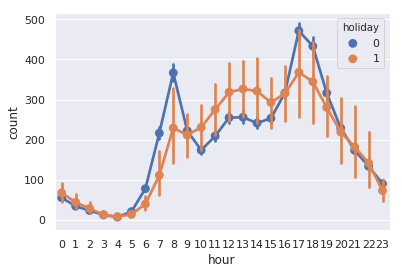

In [28]:
sns.pointplot(x=df['hour'], y=df['count'], hue=df['holiday']);

**Les locations sont plus importantes durant l'après_midi, ce qui est normal**

## Locations en fonction du temps

weather:  
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


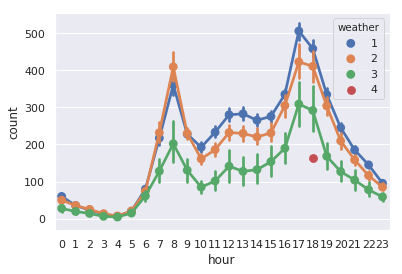

In [29]:
sns.pointplot(x=df['hour'], y=df['count'], hue=df['weather']);

**Les locations chutent en fonction de la qualité du temps, ce qui est normal.**

## Locations selon le jour de la semaine

Monday = 0  
Tuesday = 1  
Wednesday = 2  
Thrusday = 3  
Friday = 4  
Saturday = 5  
Sunday = 6

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


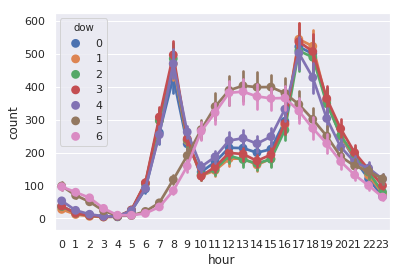

In [30]:
sns.pointplot(x=df['hour'], y=df['count'], hue=df['dow']);

**On observe 2 pics pour les jours ouvrables comme vu précedemment alors qu'on a un unique pic pour les weekends de 12h à 15h**

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


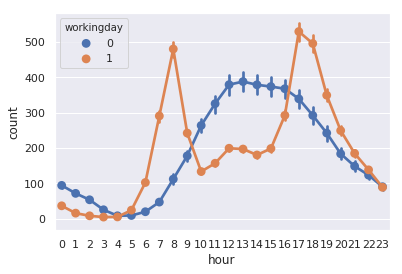

In [31]:
sns.pointplot(x=df['hour'], y=df['count'], hue=df['workingday']);

/home/fred/bin/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


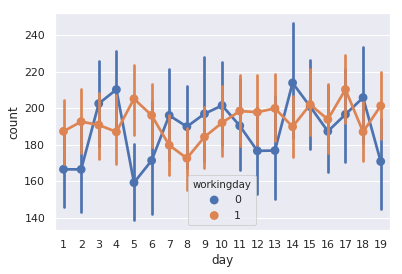

In [32]:
sns.pointplot(x=df['day'], y=df['count'], hue=df['workingday']);

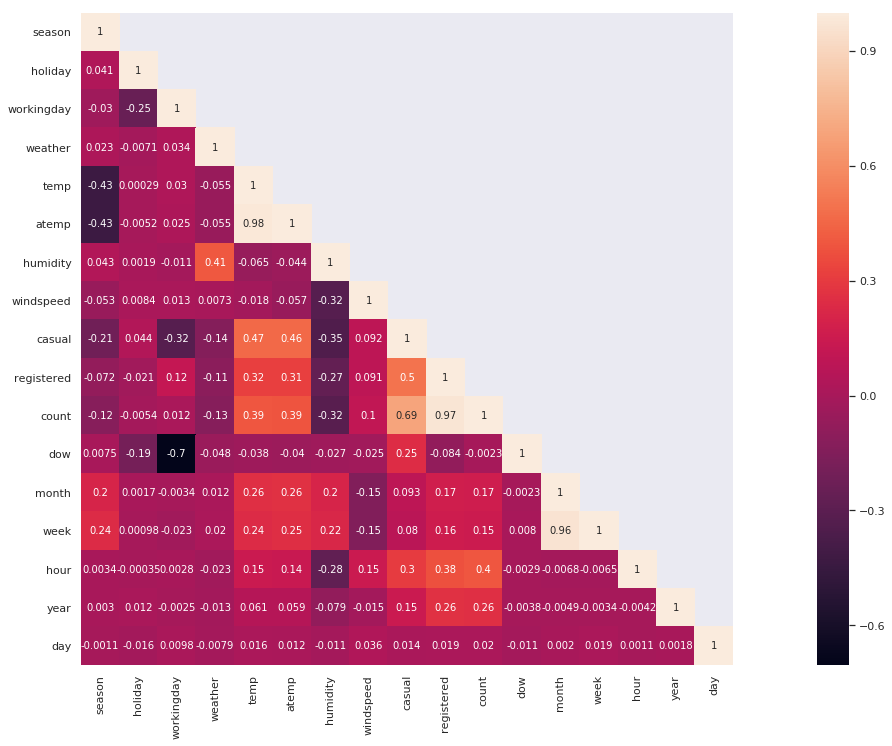

In [33]:
cor_mat = df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True);

# Machine Learning

In [185]:
X = df.loc[:, df.columns != 'count']
X = X.set_index(X['datetime'])
X = X.drop(labels='datetime', axis=1)
X = X.drop(labels='casual', axis=1)
X = X.drop(labels='registered', axis=1)
y = df['count']

In [186]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 14 columns):
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
dow           10886 non-null int64
month         10886 non-null int64
week          10886 non-null int64
hour          10886 non-null int64
year          10886 non-null int64
day           10886 non-null int64
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


In [187]:
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [190]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8708, 14), (8708,), (2178, 14), (2178,))

In [191]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dow,month,week,hour,year,day
datetime,,,,,,,,,,,,,,
2011-07-06 05:00:00,2,0,1,1,27.88,31.820,83,6.0032,2,7,27,5,2011,6
2012-08-04 16:00:00,2,0,0,1,36.90,40.910,39,19.9995,5,8,31,16,2012,4
2012-07-11 15:00:00,2,0,1,1,32.80,35.605,41,16.9979,2,7,28,15,2012,11
2011-04-10 04:00:00,1,0,0,2,14.76,18.180,93,7.0015,6,4,14,4,2011,10
2011-11-19 10:00:00,3,0,0,1,13.12,15.150,45,16.9979,5,11,46,10,2011,19


In [192]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

In [194]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso(random_state=42))])))
pipelines.append(('ScaledRID', Pipeline([('Scaler', StandardScaler()),('RID', Ridge(random_state=42))])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor(n_neighbors=2))])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor(random_state=42))])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor(random_state=42))])))
pipelines.append(('ScaledRFR', Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor(random_state=42))])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='linear'))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(random_state=42)
    cv_results = -cross_val_score(model, X_train, np.log(y_train), cv=kfold, scoring='neg_mean_squared_log_error')
    results.append(np.sqrt(cv_results))
    names.append(name)
    msg = "{}: {} ({})".format(name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.07315854786982562 (0.003158005756234917)
ScaledLASSO: 0.12823473176777392 (0.00552164797667312)
ScaledRID: 0.07316157648986647 (0.0031594079966697085)
ScaledKNN: 0.0722329254673358 (0.0015188051277910636)
ScaledCART: 0.026350481013851377 (0.0014379642751620745)
ScaledGBM: 0.01656126209082497 (0.0008763189669994173)
ScaledRFR: 0.015358869100081184 (0.0013307243204713176)
ScaledSVR: 0.07875250343061092 (0.003511915111696822)


**BEST MODEL: ScaledRandomForestRegressor**

In [196]:
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = Ridge(random_state=42)
kfold = KFold(random_state=42)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_log_error', cv=kfold)
grid_result = grid.fit(rescaledX, np.log(y_train))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("{} ({}) with: {}".format(mean, stdev, param))

print("Best: {} using {}".format(grid_result.best_score_, grid_result.best_params_))

-0.07315809965512408 (0.003157885527003149) with: {'alpha': 0.01}
-0.07315837221138138 (0.0031580125623902433) with: {'alpha': 0.1}
-0.07316111356319649 (0.003159269012172919) with: {'alpha': 1}
-0.07318983578168303 (0.003170651695489847) with: {'alpha': 10}
Best: -0.07315809965512408 using {'alpha': 0.01}
